In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'C:\\Users\\Mayank Singh\\Desktop\\Stuff\\Machine_Learning_Projects\\Housing_Price_Prediction'

In [301]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [143]:
with open("Ames_Housing_Feature_Description.txt") as f:
    print(f.read())
    

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [243]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [303]:
df = df.drop("PID",axis=1 )

In [71]:
# OUTLIERS
df.corr(numeric_only=True)['SalePrice'].sort_values()

Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0.706780
Overall Qual       0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

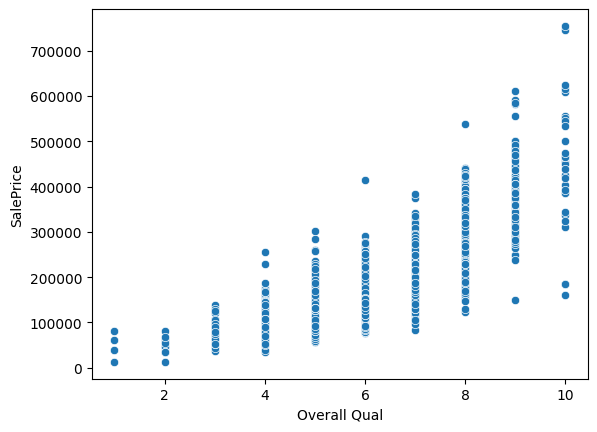

In [245]:
sns.scatterplot(x = df['Overall Qual'],y = df['SalePrice'])

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

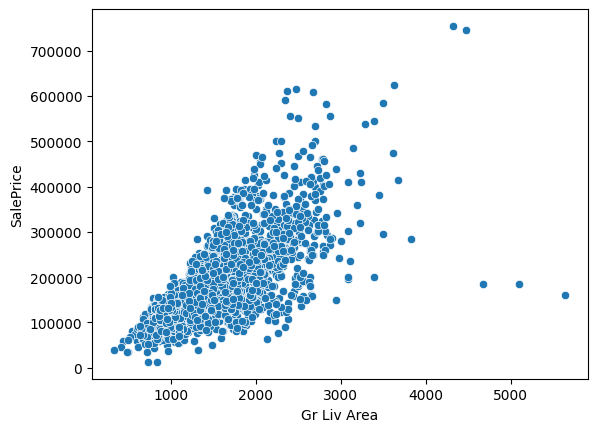

In [76]:
sns.scatterplot(x = df['Gr Liv Area'],y = df['SalePrice'])

In [304]:
rows = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)].index
df = df.drop(rows)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

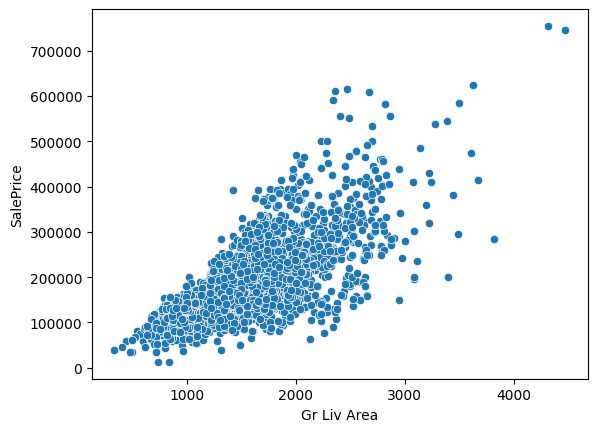

In [247]:
sns.scatterplot(x = df['Gr Liv Area'],y = df['SalePrice'])

In [248]:
perc_nan = 100*df.isnull().sum()/len(df)
perc_nan = perc_nan[perc_nan > 0].sort_values()
perc_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

In [310]:
df = df.drop('Pool QC',axis = 1)
df = df.drop('Misc Feature',axis = 1)
df = df.drop("Alley",axis = 1)
df = df.drop("Fence",axis = 1)

In [250]:
perc_nan = 100*df.isnull().sum()/len(df)
perc_nan = perc_nan[perc_nan > 0].sort_values()
perc_nan

Total Bsmt SF      0.034165
Garage Area        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Electrical         0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Cond        5.432183
Garage Qual        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
dtype: float64

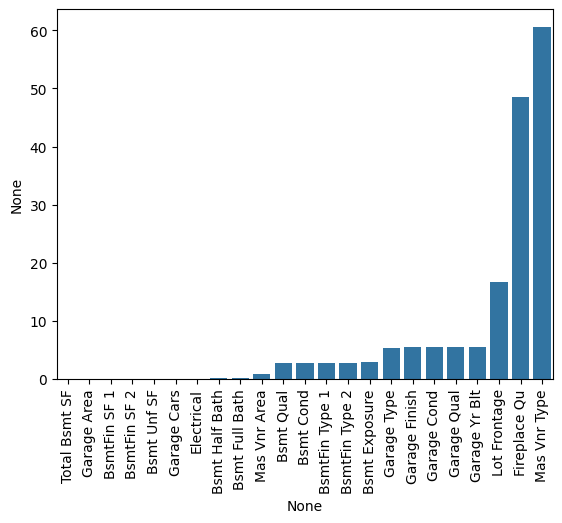

In [251]:
sns.barplot(x = perc_nan.index , y= perc_nan)
plt.xticks(rotation = 90);

In [174]:
# df[df['Total Bsmt SF'].isnull()].info()
df[df['Garage Type'].isnull()]['Garage Finish'].isnull().sum()

157

In [305]:
string = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
numeric = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']

df[string] = df[string].fillna("NA")
df[numeric] = df[numeric].fillna(0)

In [306]:
val = df[df['Bsmt Full Bath'].isnull()].index
df = df.drop(val)

In [307]:
val = df[df['Electrical'].isnull()].index
df = df.drop(val)
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [308]:
string = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
numeric = ['Garage Yr Blt','Garage Cars','Garage Area']

df[string] = df[string].fillna("NA")
df[numeric] = df[numeric].fillna(0)

In [309]:
perc_nan = 100*df.isnull().sum()/len(df)
perc_nan = perc_nan[perc_nan > 0].sort_values()
perc_nan

Mas Vnr Area     0.786594
Lot Frontage    16.757866
Fireplace Qu    48.563611
Mas Vnr Type    60.601915
Fence           80.471956
Alley           93.228454
Misc Feature    96.409029
Pool QC         99.589603
dtype: float64

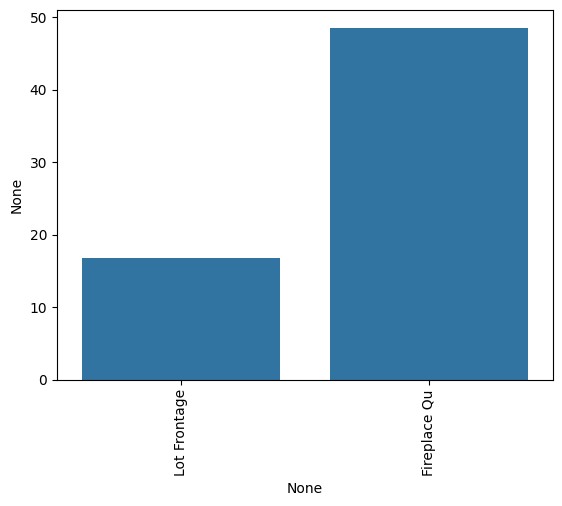

In [270]:
sns.barplot(x = perc_nan.index , y= perc_nan)
plt.xticks(rotation = 90);

In [316]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [311]:
perc_nan = 100*df.isnull().sum()/len(df)
perc_nan = perc_nan[perc_nan > 0].sort_values()
perc_nan

Mas Vnr Area     0.786594
Lot Frontage    16.757866
Fireplace Qu    48.563611
Mas Vnr Type    60.601915
dtype: float64

In [312]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [313]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('NA')

In [281]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2924, dtype: float64

In [282]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

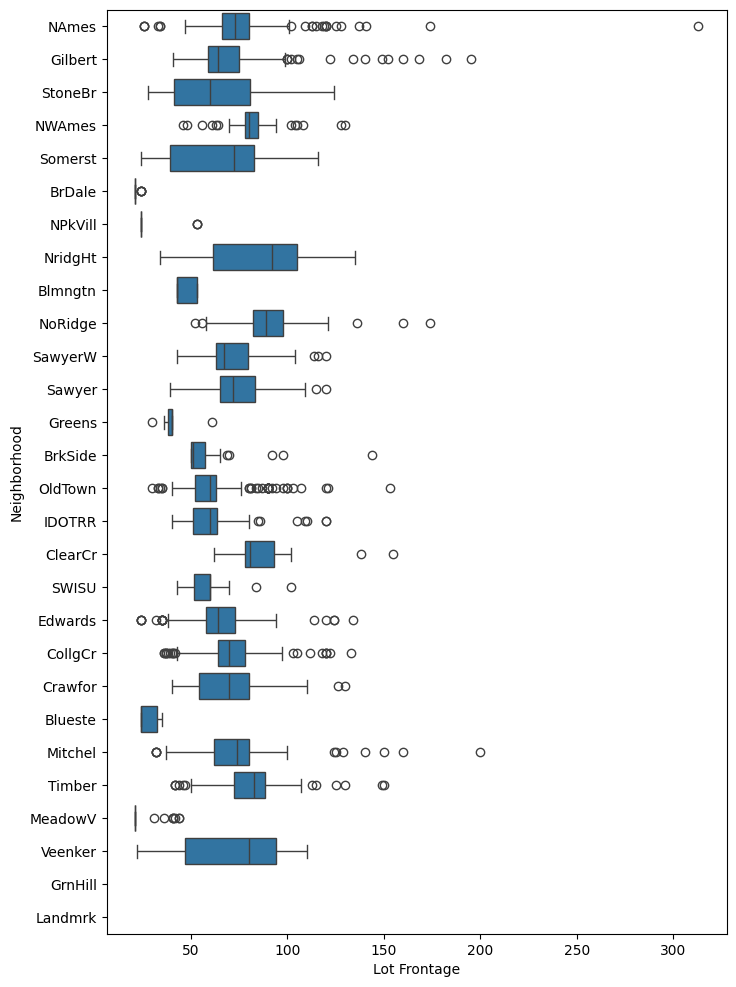

In [283]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [284]:
df.groupby('Neighborhood')['Lot Frontage'].mean()


Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.329787
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.459770
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [314]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [317]:
perc_nan = 100*df.isnull().sum()/len(df)
perc_nan = perc_nan[perc_nan > 0].sort_values()
perc_nan

Lot Frontage    0.102599
dtype: float64

In [320]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2256,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2007,WD,Normal,330000
2788,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,137000
2892,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,230000


In [327]:
val = df[df['Lot Frontage'].isnull()].index
df = df.drop(val)

In [330]:
# Convert to String
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [344]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [345]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [347]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [348]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2921 entries, 0 to 2929
Columns: 272 entries, Lot Frontage to Sale Condition_Partial
dtypes: bool(236), float64(11), int64(25)
memory usage: 1.5 MB


In [ ]:
## DATA CLEANING DONE ###

In [417]:
X = final_df.drop('SalePrice',axis = 1)
y = final_df['SalePrice']

In [418]:
from sklearn.preprocessing import PolynomialFeatures
Polynomial_Converter = PolynomialFeatures(2)
poly_features = Polynomial_Converter.fit_transform(X)

In [355]:
poly_features.shape

(2921, 37128)

In [419]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [420]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [405]:
# from sklearn.linear_model import ElasticNet
# base_elastic_net_model = ElasticNet()
# param_grid = {'alpha':[0.0001],'l1_ratio':[0.98,0.995]}

In [407]:
# from sklearn.model_selection import GridSearchCV
# grid_model = GridSearchCV(base_elastic_net_model,param_grid,scoring = ['neg_root_mean_squared_error'],cv = 3,refit = False)
# grid_model.fit(X_train,y_train)
# grid_model.best_params_

In [365]:
from sklearn.metrics import get_scorer_names
# get_scorer_names()

In [427]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)


LinearRegression()

In [428]:
pred = linear_model.predict(X_test)

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test,pred))
print(RMSE)

2137060304782537.5
